In [1]:
import pandas as pd
dataset = pd.read_csv('data_titanic3.csv')
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
# Membuang data yang kurang bermanfaat dalam pembuatan model
# name, cticket, cabin, embarked, body, home.dest akan dibuang
data_filter = dataset.iloc[:,[0, 1, 3, 4, 5, 6, 8]]
data_filter

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.00,0,0,211.3375
1,1,1,male,0.92,1,2,151.5500
2,1,0,female,2.00,1,2,151.5500
3,1,0,male,30.00,1,2,151.5500
4,1,0,female,25.00,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,0,female,14.50,1,0,14.4542
1305,3,0,female,NaN,1,0,14.4542
1306,3,0,male,26.50,0,0,7.2250
1307,3,0,male,27.00,0,0,7.2250


In [3]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 66.5+ KB


In [4]:
# Menghitung nilai median dari data age dan data fare
median_age = data_filter.age.median()
median_fare = data_filter.fare.median()

In [5]:
# Mengisi nilai kosong pada data age degan nilai median_age dan data fare dengan nilai median_fare
data_filter['age'].fillna(median_age, inplace = True)
data_filter['fare'].fillna(median_fare, inplace = True)

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [6]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 66.5+ KB


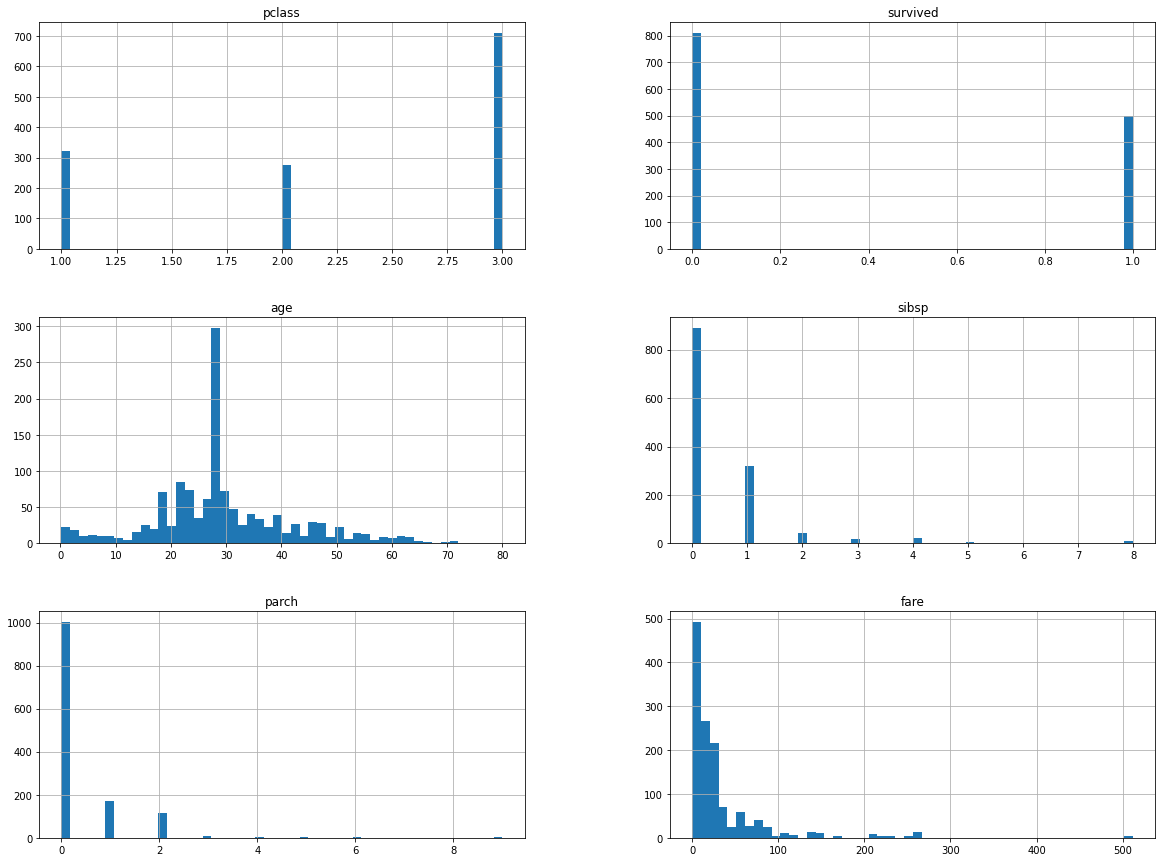

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
data_filter.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
data_filter.parch.value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

In [9]:
data_filter.sibsp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [10]:
data_filter = data_filter[(data_filter.sibsp < 5) & (data_filter.parch < 5)]

In [11]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1284 non-null   int64  
 1   survived  1284 non-null   int64  
 2   sex       1284 non-null   object 
 3   age       1284 non-null   float64
 4   sibsp     1284 non-null   int64  
 5   parch     1284 non-null   int64  
 6   fare      1284 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 75.2+ KB


In [12]:
data_filter

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.00,0,0,211.3375
1,1,1,male,0.92,1,2,151.5500
2,1,0,female,2.00,1,2,151.5500
3,1,0,male,30.00,1,2,151.5500
4,1,0,female,25.00,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,0,female,14.50,1,0,14.4542
1305,3,0,female,28.00,1,0,14.4542
1306,3,0,male,26.50,0,0,7.2250
1307,3,0,male,27.00,0,0,7.2250


In [13]:
# Membagi dataframe menjadi 80% data latih dan 20% data uji
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1, test_size=0.2, random_state=42)

In [14]:
for train_index, test_index in split.split(data_filter, data_filter['survived']):
    strat_train_set = data_filter.iloc[train_index]
    strat_test_set = data_filter.iloc[test_index]

In [15]:
 strat_train_set

,pclass,survived,sex,age,sibsp,parch,fare
905,3,1,male,32.0,0,0,7.8542
953,3,1,male,22.0,0,0,7.2250
820,3,1,male,9.0,0,2,20.5250
1275,3,0,male,16.0,2,0,18.0000
485,2,0,male,36.0,0,0,12.8750
...,...,...,...,...,...,...,...
941,3,1,male,25.0,0,0,7.2292
555,2,0,male,25.0,0,0,13.0000
95,1,1,female,54.0,1,1,81.8583
302,1,1,female,35.0,0,0,512.3292


In [16]:
strat_test_set

,pclass,survived,sex,age,sibsp,parch,fare
572,2,1,female,28.00,0,0,12.6500
86,1,1,male,51.00,0,0,26.5500
452,2,1,female,29.00,1,0,26.0000
3,1,0,male,30.00,1,2,151.5500
474,2,0,male,31.00,0,0,10.5000
...,...,...,...,...,...,...,...
1166,3,0,male,28.00,0,0,7.2250
1056,3,1,male,12.00,1,0,11.2417
465,2,1,female,23.00,0,0,13.7917
747,3,0,male,0.33,0,2,14.4000


In [17]:
dataset_features_train = strat_train_set.drop(['pclass', 'survived', 'sex', 'sibsp', 'parch'], axis = 1)
dataset_labels_train = strat_train_set['survived']

dataset_features_test = strat_test_set.drop(['pclass', 'survived', 'sex', 'sibsp', 'parch'], axis = 1)
dataset_labels_test = strat_test_set['survived']

In [18]:
dataset_features_train

,age,fare
905,32.0,7.8542
953,22.0,7.2250
820,9.0,20.5250
1275,16.0,18.0000
485,36.0,12.8750
...,...,...
941,25.0,7.2292
555,25.0,13.0000
95,54.0,81.8583
302,35.0,512.3292


In [19]:
dataset_features_test

,age,fare
572,28.00,12.6500
86,51.00,26.5500
452,29.00,26.0000
3,30.00,151.5500
474,31.00,10.5000
...,...,...
1166,28.00,7.2250
1056,12.00,11.2417
465,23.00,13.7917
747,0.33,14.4000


In [20]:
X_train = dataset_features_train.values
y_train = dataset_labels_train.values

X_test = dataset_features_test.values
y_test = dataset_labels_test.values

In [21]:
X_train

array([[ 32.    ,   7.8542],
       [ 22.    ,   7.225 ],
       [  9.    ,  20.525 ],
       ...,
       [ 54.    ,  81.8583],
       [ 35.    , 512.3292],
       [ 22.    ,   7.25  ]])

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
sex_train_encoded = ordinal_encoder.fit_transform(strat_train_set[['sex']])
sex_test_encoded = ordinal_encoder.fit_transform(strat_test_set[['sex']])

In [24]:
sex_train_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

pclass_train = cat_encoder.fit_transform(strat_train_set[['pclass']])
sibsp_train = cat_encoder.fit_transform(strat_train_set[['sibsp']])
parch_train = cat_encoder.fit_transform(strat_train_set[['parch']])

pclass_test = cat_encoder.fit_transform(strat_test_set[['pclass']])
sibsp_test = cat_encoder.fit_transform(strat_test_set[['sibsp']])
parch_test = cat_encoder.fit_transform(strat_test_set[['parch']])

In [26]:
pclass_train.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [27]:
sibsp_train.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [28]:
parch_train.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [29]:
import numpy as np

#Menggabungkan data sex, pclass, sibsp, dan parch ke dalam data latih
data_train = np.concatenate((X_train, sex_train_encoded, pclass_train.toarray(), sibsp_train.toarray(), parch_train.toarray()), axis=1)
data_train[0]

array([ 0.20851882, -0.49469265,  1.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [30]:
pclass_test.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [31]:
#Menggabungkan data sex, pclass, sibsp, dan parch ke dalam data uji
data_test = np.concatenate((X_test, sex_test_encoded, pclass_test.toarray(), sibsp_test.toarray(), parch_test.toarray()), axis=1)
data_test[0]

array([-0.10430815, -0.39674046,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [32]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
# Prediksi nilai y dengan Decision Tree
y_pred_dt = classifier.predict(X_test)
y_pred_dt

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [34]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [35]:
# Prediksi nilai y dengan SVC

y_pred_svc = svm_clf.predict(X_test)
y_pred_svc

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[141,  16],
       [ 67,  33]], dtype=int64)

In [37]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[138,  19],
       [ 63,  37]], dtype=int64)

In [38]:
#Decision Tree
tn_dt = cm_dt[0][0]
fn_dt = cm_dt[1][0]
fp_dt = cm_dt[0][1]
tp_dt = cm_dt[1][1]

#SVC
tn_svc = cm_svc[0][0]
fn_svc = cm_svc[1][0]
fp_svc = cm_svc[0][1]
tp_svc = cm_svc[1][1]

In [39]:
#Decision Tree
spec_dt = tn_dt/(tn_dt + fp_dt)
sense_dt = tp_dt/(tp_dt + fn_dt)
acc_dt = (tp_dt + tn_dt)/(tp_dt + tn_dt + fp_dt + fn_dt)
npv_dt = tn_dt/(tn_dt + fn_dt)
prec_dt = tp_dt/(tp_dt + fp_dt)

#SVC
spec_svc = tn_svc/(tn_svc + fp_svc)
sense_svc = tp_svc/(tp_svc + fn_svc)
acc_svc = (tp_svc + tn_svc)/(tp_svc + tn_svc + fp_svc + fn_svc)
npv_svc = tn_svc/(tn_svc + fn_svc)
prec_svc = tp_svc/(tp_svc + fp_svc)

In [40]:
print("Decision Tree")
print("Specificity = %.3f" %(spec_dt * 100) + "%")
print("Sensitivity = %.3f" %(sense_dt * 100) + "%")
print("Accuracy = %.3f" %(acc_dt * 100) + "%")
print("Negative Predictive Value = %.3f" %(npv_dt * 100) + "%")
print("Precision = %.3f" %(prec_dt * 100) + "%")
print()
print("SVC")
print("Specificity = %.3f" %(spec_svc * 100) + "%")
print("Sensitivity = %.3f" %(sense_svc * 100) + "%")
print("Accuracy = %.3f" %(acc_svc * 100) + "%")
print("Negative Predictive Value = %.3f" %(npv_svc * 100) + "%")
print("Precision = %.3f" %(prec_svc * 100) + "%")

Decision Tree
Specificity = 89.809%
Sensitivity = 33.000%
Accuracy = 67.704%
Negative Predictive Value = 67.788%
Precision = 67.347%

SVC
Specificity = 87.898%
Sensitivity = 37.000%
Accuracy = 68.093%
Negative Predictive Value = 68.657%
Precision = 66.071%


Decision Tree: ROC AUC=0.614
SVC: ROC AUC=0.624


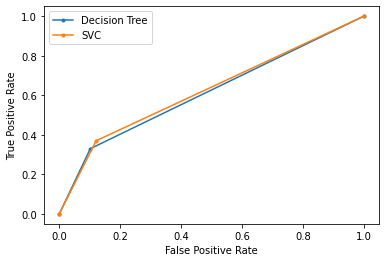

In [41]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
lr_auc_dt = roc_auc_score(y_test, y_pred_dt)
lr_auc_svc = roc_auc_score(y_test, y_pred_svc)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (lr_auc_dt))
print('SVC: ROC AUC=%.3f' % (lr_auc_svc))
# calculate roc curves
lr_fpr_dt, lr_tpr_dt, _ = roc_curve(y_test, y_pred_dt)
lr_fpr_svc, lr_tpr_svc, _ = roc_curve(y_test, y_pred_svc)
# plot the roc curve for the model
pyplot.plot(lr_fpr_dt, lr_tpr_dt, marker='.', label='Decision Tree')
pyplot.plot(lr_fpr_svc, lr_tpr_svc, marker='.', label='SVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

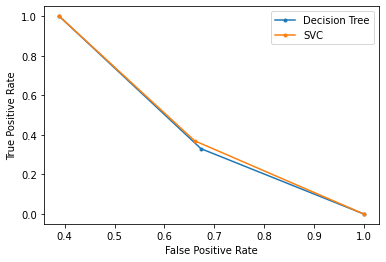

In [42]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# calculate precision recall curve
lr_fpr_dt, lr_tpr_dt, _ = precision_recall_curve(y_test, y_pred_dt)
lr_fpr_svc, lr_tpr_svc, _ = precision_recall_curve(y_test, y_pred_svc)
# plot the precision recall curve for the model
pyplot.plot(lr_fpr_dt, lr_tpr_dt, marker='.', label='Decision Tree')
pyplot.plot(lr_fpr_svc, lr_tpr_svc, marker='.', label='SVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Kesimpulan

Jika kita meninjau nilai AUC dari kedua algoritma tersebut, maka kita bisa mengetahui bahwa SVC lebih baik daripada Decision Tree karena nilai AUC SVC lebih besar daripada nilai AUC Decision Tree. 

Jika kita meninjau grafik precision recall curve dari kedua algoritma tersebut, maka kita kita bisa mengetahui bahwa SVC lebih baik daripada Decision Tree karena kurva SVC berada di atas kurva Decision Tree.

Jika kita meninjau lebih detail, maka:
1. Decision Tree lebih baik dalam hal specificity dan precision
2. SVC lebih baik dalam hal sensitivity, accuracy, dan negative predict value